Peter Attia

This notebook has a quick analysis on lifetime vs. charging time.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Read in data from SI Table 9, link [here](
https://static-content.springer.com/esm/art%3A10.1038%2Fs41560-019-0356-8/MediaObjects/41560_2019_356_MOESM1_ESM.pdf)

In [2]:
df = pd.read_csv("severson_et_al_SI_table9.csv")
df

,Cell barcode,Dataset,Batch date,Cycle life,Charging policy
0,EL150800460514,Prim. Test,5/12/17,1852,3.6C(80%)-3.6C
1,EL150800460486,Train,5/12/17,2160,3.6C(80%)-3.6C
2,EL150800460623,Prim. Test,5/12/17,2237,3.6C(80%)-3.6C
3,EL150800464977,Train,5/12/17,1434,4C(80%)-4C
4,EL150800464865,Prim. Test,5/12/17,1709,4C(80%)-4C
...,...,...,...,...,...
119,EL150800737361,Sec. test,4/12/18,1156,5.3C(54%)-4C
120,EL150800737390,Sec. test,4/12/18,796,5.6C(19%)-4.6C
121,EL150800739495,Sec. test,4/12/18,786,5.6C(36%)-4.3C
122,EL150800737369,Sec. test,4/12/18,940,5.3C(54%)-4C


Split out C1, C2, and Q1:

In [3]:
df["C1"] = df["Charging policy"].str.split("C").str[0].astype("float")
df["C2"] = df["Charging policy"].str.split("-").str[1].str.split("C").str[0].astype("float")
df["Q1"] = df["Charging policy"].str.split("(").str[1].str.split("%").str[0].astype("float")
df

,Cell barcode,Dataset,Batch date,Cycle life,Charging policy,C1,C2,Q1
0,EL150800460514,Prim. Test,5/12/17,1852,3.6C(80%)-3.6C,3.60,3.60,80.0
1,EL150800460486,Train,5/12/17,2160,3.6C(80%)-3.6C,3.60,3.60,80.0
2,EL150800460623,Prim. Test,5/12/17,2237,3.6C(80%)-3.6C,3.60,3.60,80.0
3,EL150800464977,Train,5/12/17,1434,4C(80%)-4C,4.00,4.00,80.0
4,EL150800464865,Prim. Test,5/12/17,1709,4C(80%)-4C,4.00,4.00,80.0
...,...,...,...,...,...,...,...,...
119,EL150800737361,Sec. test,4/12/18,1156,5.3C(54%)-4C,5.30,4.00,54.0
120,EL150800737390,Sec. test,4/12/18,796,5.6C(19%)-4.6C,5.60,4.60,19.0
121,EL150800739495,Sec. test,4/12/18,786,5.6C(36%)-4.3C,5.60,4.30,36.0
122,EL150800737369,Sec. test,4/12/18,940,5.3C(54%)-4C,5.30,4.00,54.0


Calculate charging time (minutes from 0 to 80%):

In [4]:
df["time"] = (60 / df.C1) * (df.Q1 / 100) + (60 / df.C2) * ((80 - df.Q1) / 100)
df.time

0      13.333333
1      13.333333
2      13.333333
3      12.000000
4      12.000000
         ...    
119    10.013208
120     9.992236
121     9.996678
122    10.013208
123    11.009174
Name: time, Length: 124, dtype: float64

Find min charging times:

In [5]:
df[df.time == df.time.min()]

,Cell barcode,Dataset,Batch date,Cycle life,Charging policy,C1,C2,Q1,time
20,EL150800460617,Prim. Test,5/12/17,854,5.4C(80%)-5.4C,5.4,5.4,80.0,8.888889
21,EL150800460659,Train,5/12/17,870,5.4C(80%)-5.4C,5.4,5.4,80.0,8.888889


Plot lifetime vs. charging time:

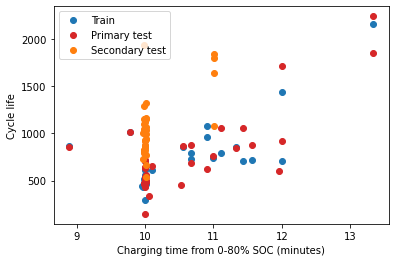

In [6]:
df_train = df[df.Dataset == "Train"]
df_test1 = df[df.Dataset == "Prim. Test"]
df_test2 = df[df.Dataset == "Sec. test"]

plt.plot(df_train["time"], df_train["Cycle life"], "o", color="tab:blue", label="Train")
plt.plot(df_test1["time"], df_test1["Cycle life"], "o", color="tab:red", label="Primary test")
plt.plot(df_test2["time"], df_test2["Cycle life"], "o", color="tab:orange", label="Secondary test")

plt.legend()
plt.xlabel("Charging time from 0-80% SOC (minutes)")
plt.ylabel("Cycle life")
plt.savefig("cycle_life_vs_charging_time.png", dpi=300, bbox_inches="tight")

Note that the "6/30/17" and "4/12/18" batches both have fixed 10 minute charging but different rest conditions (see more info [here](https://data.matr.io/1/projects/5c48dd2bc625d700019f3204)), so charging time/protocol is not a sole determinant of lifetime.